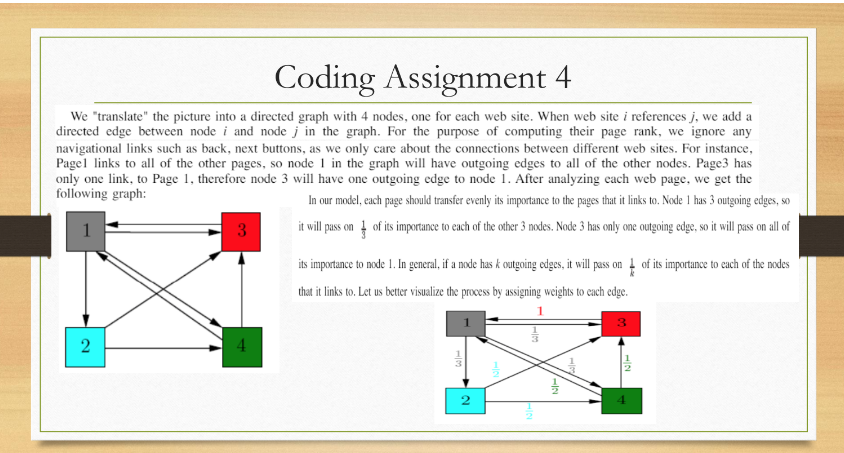

### PROBLEM STATEMENT
1. Formulate the importance of each page as a linear algebra problem
2. Verify the solution to the problem is a Eigen Vector
3. Rescale the Eigenvector as a probability by making sure sum of all entries in the Eigenvector=1

### APPROACH


#### Importing library

In [36]:
import numpy as np

#### Defining the matrix based on the graph
Crete a matrix based on the directed graph

In [37]:
pages=[[0,1,1,1],
 [0,0,1,1],
  [1,0,0,0],
   [1,0,1,0]]

#### Creating a column stochastic matrix
1. Initialize an empty list `st_matrix`.
2. Iterate through each row of the `pages` matrix:
    - Calculate the number of outgoing links (`num_links`) for the current page by summing the non-zero elements in the row.
    - Create an empty list `st_row` to store the probabilities for the current row.
    - Iterate through each element in the row:
        - If the element is non-zero, append `1 / num_links` to `st_row`.
        - If the element is zero, append `0` to `st_row`.
    - Append `st_row` to `st_matrix`.
3. Transpose the `st_matrix` using NumPy's `transpose()` function.
4. Return the transposed `st_matrix`.matrixd the stochastic matrix.


In [56]:
def stochastic_matrix(pages):
    num_pages = len(pages)
    st_matrix = []

    for i, page_links in enumerate(pages):
        num_links = sum(1 for link in page_links if link != 0)
        st_row = []

        for j, link in enumerate(page_links):
            if link != 0:
                st_row.append(1 / num_links)
            else:
                st_row.append(0)

        st_matrix.append(st_row)

    # Transpose the st_matrix
    st_matrix_transposed = np.transpose(st_matrix)

    return st_matrix_transposed

#### Printing the linear equations matrix

In [73]:
matrix = stochastic_matrix(pages)
print("\nStochastic matrix:")
for row in matrix:
    print(row)



Stochastic matrix:
[0.  0.  1.  0.5]
[0.33333333 0.         0.         0.        ]
[0.33333333 0.5        0.         0.5       ]
[0.33333333 0.5        0.         0.        ]


#### Interpretation from Stochastic Matrix

The stochastic matrix provides a set of linear equations representing the probabilities of visiting each page:

  - page1 = page3 + page4 / 2
  - page2 = page1 / 3
  - page3 = page1 / 3 + page2 / 2 + page4 / 2
  - page4 = page1 / 3 + page2 / 2e2 / 2 |
e2 / 2


#### Finding Page rank
The PageRank algorithm can indeed be interpreted in terms of eigenvectors and eigenvalues. The equation 

\[ AV = V \]

in the PageRank algorithm is analogous to the eigenvalue equation 

\[ AX = lambda X \].

In the context of PageRank:

- \( A \) represents the transition probability matrix, which describes the probability of transitioning from one page to another.
- \( V \) represents the PageRank vector, which contains the PageRank scores for each page.
- \( lambda \) represents the dominant eigenvalue, and \( X \) represents the corresponding eigenvector.

The dominant eigenvector \( X \) corresponds to the PageRank vector, and the corresponding eigenvalue \( lambda \) represents the damping factor used in the PageRank algorithm.


#### Function to calculate Eigen Vector and Values

In [74]:
def eigen_values_vectors(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    eig_matrix = np.column_stack(eigenvectors)
    index = np.argmax(np.abs(eigenvalues))
    return np.real(eig_matrix[index]),eigenvalues ,eigenvectors

In [75]:
pagerank,eigenvalues ,eigenvectors = eigen_values_vectors(matrix)
print("Eigen Values\n")
print(eigenvalues)
print("Eigen Vectors\n")
print(eigenvectors)
print("Page rank:")
print(pagerank)

Eigen Values

[ 1.        +0.j         -0.36062333+0.41097555j -0.36062333-0.41097555j
 -0.27875333+0.j        ]
Eigen Vectors

[[ 0.72101012+0.j         -0.75521571+0.j         -0.75521571-0.j
   0.50648562+0.j        ]
 [ 0.24033671+0.j          0.3036721 +0.34607247j  0.3036721 -0.34607247j
  -0.60565568+0.j        ]
 [ 0.54075759+0.j          0.09315321-0.2746779j   0.09315321+0.2746779j
  -0.38153917+0.j        ]
 [ 0.36050506+0.j          0.3583904 -0.07139457j  0.3583904 +0.07139457j
   0.48070923+0.j        ]]
Page rank:
[0.72101012 0.24033671 0.54075759 0.36050506]


#### Scaling the eigen vectors
**Scaling:**
The PageRank scores (`pagerank`) are divided element-wise by the sum of all PageRank scores using `np.sum(pagerank)`.

**Reasoning:**
Dividing by the sum ensures that the sum of all PageRank scores becomes 1, making them represent probabilities. This normalization is necessary because PageRank scores are typically interpreted as the probability that a random surfer will visit a particular page.

**Interpretation:**
After normalization, each PageRank score represents the probability of landing on the corresponding page when starting from any page on the web.


In [72]:
pagerank = pagerank / np.sum(pagerank)
print("Pagerank:")
print(pagerank)
print("Summing up of scaled values (pagerank) is equal to : ",sum(pagerank))

Pagerank:
[0.38709677 0.12903226 0.29032258 0.19354839]
Summing up of scaled values (pagerank) is equal to :  1.0


In [70]:
print("Importance of each page:")
for i in range(len(pagerank)):
   print(f"Page{i+1} = {round(pagerank[i], 3)}")


Importance of each page:
Page1 = 0.387
Page2 = 0.129
Page3 = 0.29
Page4 = 0.194
